Importing the libraries

In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset and printing all of its features

In [271]:
dataset = pd.read_csv('forest.csv')
dataset = dataset.dropna()
dataset['Classes'] = dataset['Classes'].str.strip()
print(dataset.columns)

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')


Splitting the dataset into features (X) and target (Y) and encoding the 'Classes' feature (LABEL): 'fire' as 1 and 'not fire' as 0.


In [272]:
X = dataset.drop('Classes', axis=1)
Y = dataset['Classes'].map({'fire': 1, 'not fire': 0})


In [273]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64


Heatmap for checking for correlations

<Axes: >

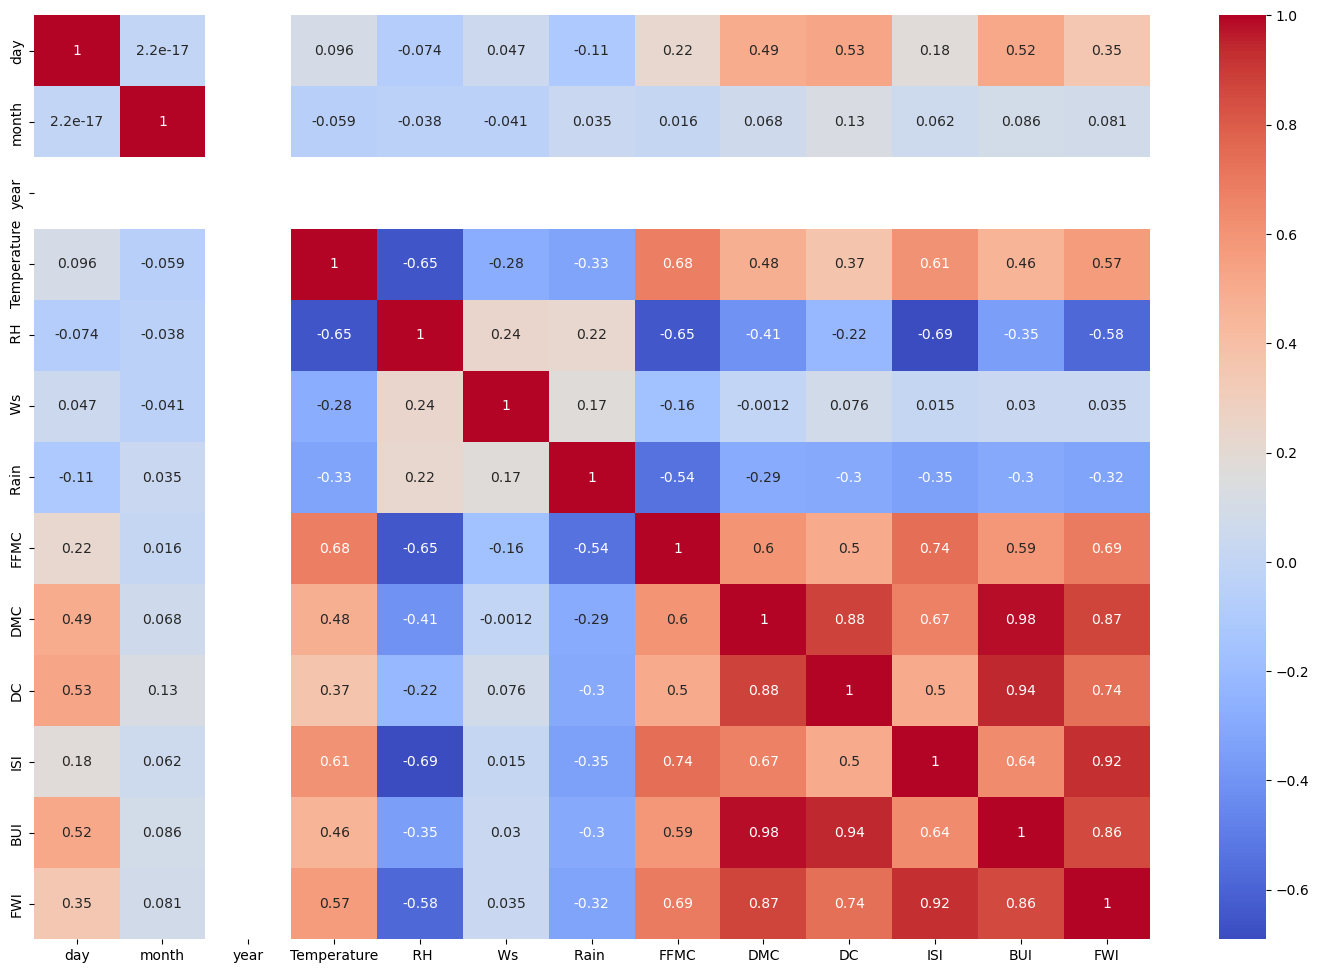

In [274]:
fig, ax = plt.subplots(figsize=(18, 12))
correlation = X.corr()
sns.heatmap(correlation, annot=True, ax=ax, cmap='coolwarm')

Dropping the year column because it's the same for all the data - so it's not giving us any help.

In [275]:
X.drop('year', axis=1, inplace=True)
X.drop('DMC', axis=1, inplace=True)
X.drop('DC', axis=1, inplace=True)
X.drop('FWI', axis=1, inplace=True)
X.drop('BUI', axis=1, inplace=True)
# X.drop('FFMC', axis=1, inplace=True)

<Axes: >

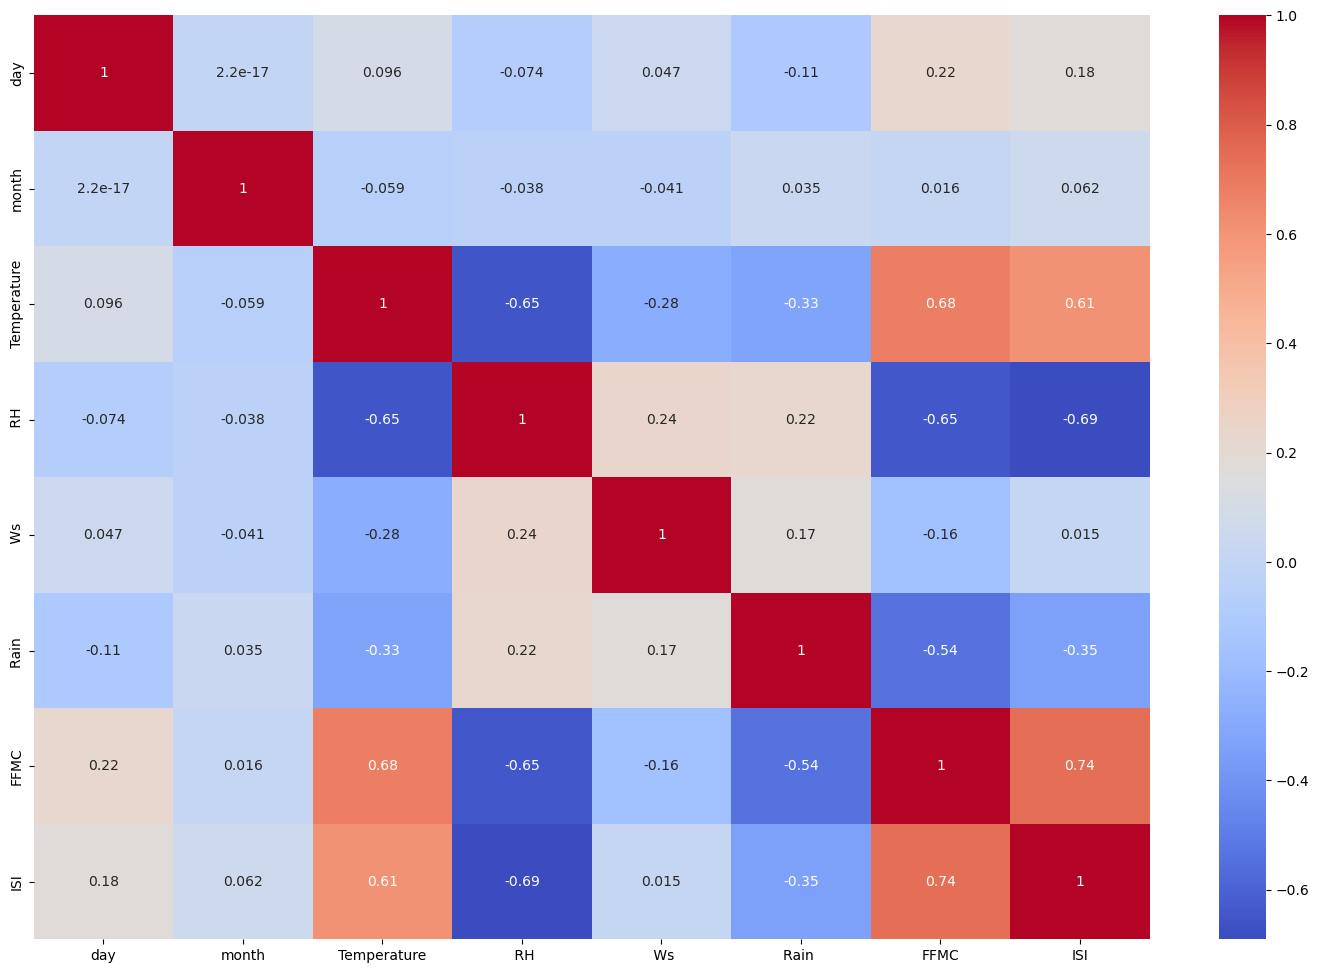

In [276]:
fig, ax = plt.subplots(figsize=(18, 12))
correlation = X.corr()
sns.heatmap(correlation, annot=True, ax=ax, cmap='coolwarm')

Splitting the dataset into training and testing and scale it

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


Model Training:
    Use GridSearchCV to find the best hyperparameters for the DecisionTreeClassifier.
    Train the model using the training set.


In [278]:
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50 ,60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid,scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

best_model.fit(X_train, Y_train)



Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


DecisionTreeClassifier(min_samples_leaf=2, random_state=42)

Accuracy: 0.9672131147540983
Confusion matrix:
[[26  2]
 [ 0 33]]


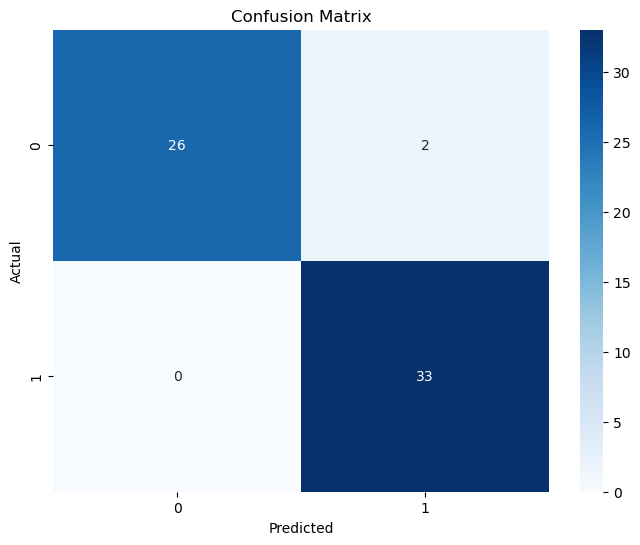

Recall: 1.0
Precision: 0.9428571428571428
F1 Score: 0.9705882352941176


In [286]:
predictions = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# Assuming Y_test is the actual labels for your test data
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)
print("Confusion matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

recall = recall_score(Y_test, predictions)
print("Recall:", recall)

precision = precision_score(Y_test, predictions)
print("Precision:", precision)

f1 = f1_score(Y_test, predictions)
print("F1 Score:", f1)






Decision Tree

AUC: 0.96


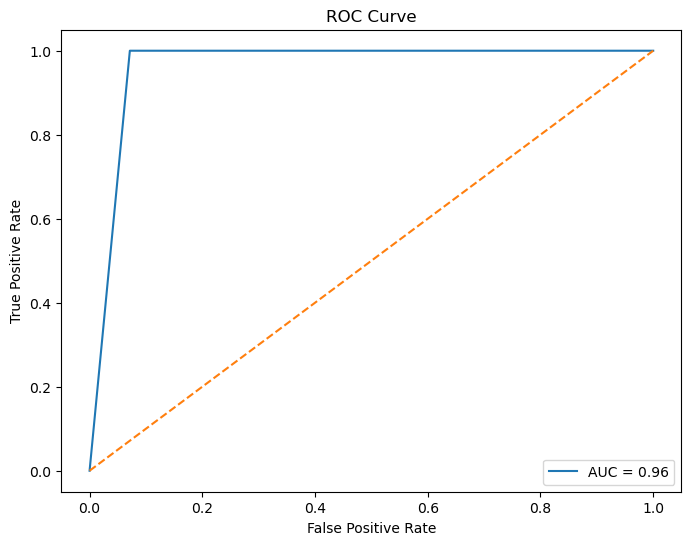

In [281]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC
y_prob = best_model.predict_proba(X_test)[:, 1]  # Get the probabilities of the positive class(1)
auc = roc_auc_score(Y_test, y_prob)
print(f"AUC: {auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

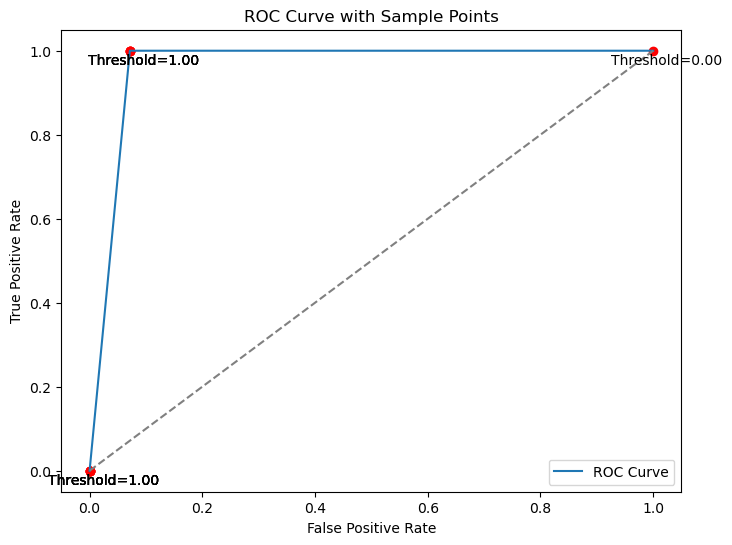

   Threshold  False Positive Rate  True Positive Rate
0        1.0             0.000000                 0.0
1        1.0             0.000000                 0.0
2        1.0             0.000000                 0.0
3        1.0             0.000000                 0.0
4        1.0             0.000000                 0.0
5        1.0             0.071429                 1.0
6        1.0             0.071429                 1.0
7        1.0             0.071429                 1.0
8        1.0             0.071429                 1.0
9        0.0             1.000000                 1.0
Mathematical calculations for sample points:
Threshold = 1.00: FPR = 0.07, TPR = 1.00
Threshold = 1.00: FPR = 0.07, TPR = 1.00
Threshold = 1.00: FPR = 0.07, TPR = 1.00
Threshold = 1.00: FPR = 0.07, TPR = 1.00
Threshold = 1.00: FPR = 0.07, TPR = 1.00
Threshold = 1.00: FPR = 0.07, TPR = 1.00
Threshold = 1.00: FPR = 0.07, TPR = 1.00
Threshold = 1.00: FPR = 0.07, TPR = 1.00
Threshold = 1.00: FPR = 0.07, TPR

In [282]:
# Ensure the thresholds are within the correct range
thresholds = np.clip(thresholds, 0, 1)

# Select 10 sample points for the ROC curve
sample_indices = np.linspace(0, len(fpr) - 1, 10, dtype=int)
sample_fpr = fpr[sample_indices]
sample_tpr = tpr[sample_indices]
sample_thresholds = thresholds[sample_indices]

# Plot ROC curve and sample points
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(sample_fpr, sample_tpr, color='red')
for i, txt in enumerate(sample_thresholds):
    plt.annotate(f'Threshold={txt:.2f}', (sample_fpr[i], sample_tpr[i]), textcoords="offset points", xytext=(10,-10), ha='center')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Sample Points')
plt.legend(loc='lower right')
plt.show()

# Display the sample points and their coordinates
sample_points = pd.DataFrame({
    'Threshold': sample_thresholds,
    'False Positive Rate': sample_fpr,
    'True Positive Rate': sample_tpr
})
print(sample_points)

# Display the math work for the coordinates of the points
print("Mathematical calculations for sample points:")
for i, threshold in enumerate(sample_thresholds):
    y_pred_sample = (y_prob >= threshold).astype(int)
    cm_sample = confusion_matrix(Y_test, y_pred_sample)
    tn, fp, fn, tp = cm_sample.ravel()
    sample_fpr_calc = fp / (fp + tn)
    sample_tpr_calc = tp / (tp + fn)
    print(f"Threshold = {threshold:.2f}: FPR = {sample_fpr_calc:.2f}, TPR = {sample_tpr_calc:.2f}")

       Feature  Importance
7          ISI    0.945391
6         FFMC    0.027170
0          day    0.021790
5        Rain     0.005649
1        month    0.000000
2  Temperature    0.000000
3           RH    0.000000
4           Ws    0.000000


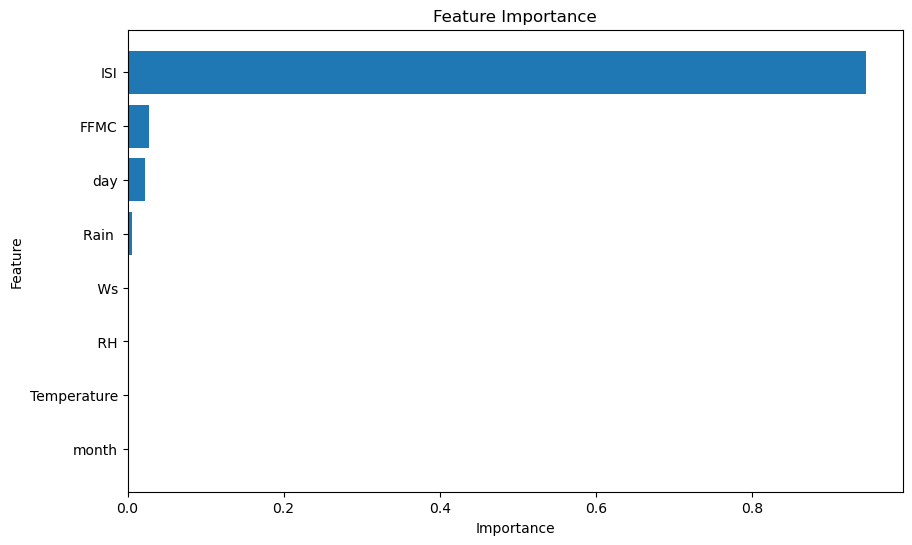

In [285]:
importance = best_model.feature_importances_
feature_names = X.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

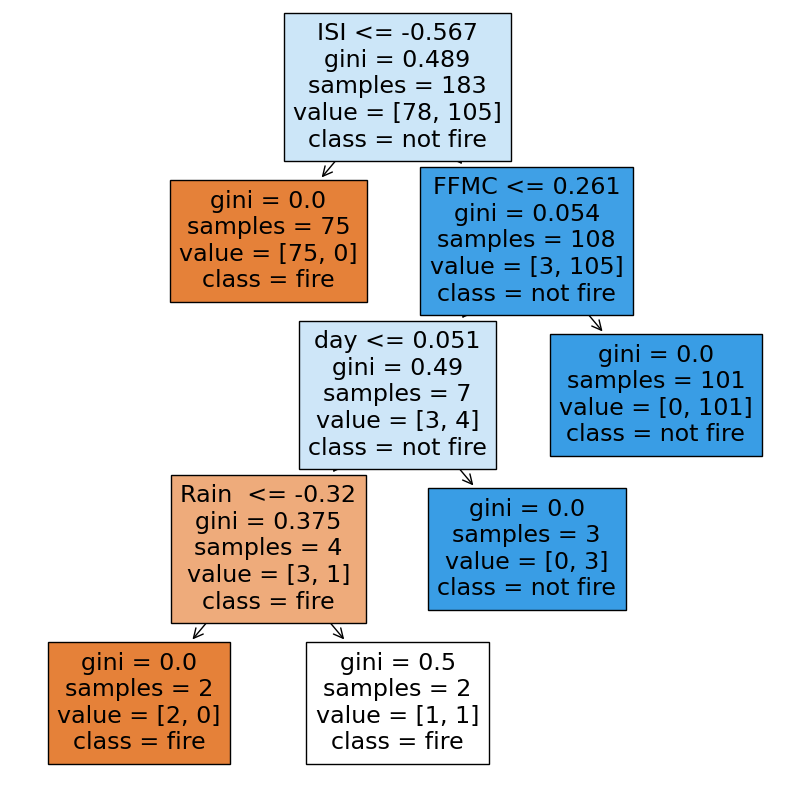

In [280]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'best_model' is your trained DecisionTreeClassifier and 'X' your features dataframe
plt.figure(figsize=(10, 10))  # Set the size of the plot, you can adjust this as needed
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['fire', 'not fire'])
plt.show()
